<a href="https://colab.research.google.com/github/piyushsonavane/Play-Store-App-Review-Analysis-By-Piyush/blob/main/Copy_of_Play_Store_App_Review_Analysis_By_Piyush_Sonavane_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Play Store App Review Analysis By Piyush Sonavane

# **The Play Store apps data has infinite potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.**









# **Each app (row) has values for catergory, rating, size, and more. Another dataset which contains customer reviews for android apps.**

# **Introduction**

**In this EDA, we will explore and analyze the given datasets based on "Play Store Review Analysis" as well as "User Review analyze .The objective of this project is to deliver insights to understand customer demands better and which helps developer to popularize the product.In this notebook, we will do a comprehensive analysis of the Android app market by comparing more than ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.**

***We have two datasets in this project :***

**playstore data.csv:** *contains all the details of the applications on Google Play Store. There are 13 features that describe a given app.*

**user_reviews.csv**: *contains 100 reviews with some coloums for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity*



**first**

**let's import the required libraries.** **Then load the data set**. 



# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading both CSV Files From Drive and storing in dataframe

In [ ]:
from pandas.io.parsers.readers import read_csv
df=pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')
sentiment_df = pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

# Exploring the Dataset

**play store dataframe:**

In [ ]:
#Shape of Play store dataframe
df.shape

(10841, 13)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Description of the columns present in play store dataframe :**


Play store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:


**App** - *It tells us about the name of the application with a short description (optional).*

**Category** - *It gives the category to the app.*

**Rating** - *It contains the average rating the respective app received from its users.*

**Reviews** - *It tells us about the total number of users who have given a review for the application.*

**Size** - *It tells us about the size being occupied the application on the mobile phone.*

**Installs** - *It tells us about the total number of installs/downloads for an application.*

**Type** - *It states whether an app is free to use or paid*

**Price** - *It gives the price payable to install the app. For free type apps, the price is zero.* 

**Content Rating** - *It states whether or not an app is suitable for all age groups or not.* 

**Genres** - *It tells us about the various other categories to which an application can belong.*
 
**Last Updated** - *It tells us about the when the application was updated.* 

**Current Ver** - *It tells us about the current version of the application.*

**Android Ver** - *It tells us about the android version which can support the application on its platform.*


**User review dataframe:**

In [ ]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
sentiment_df.shape

(64295, 5)

In [ ]:
print(sentiment_df.shape)

print(sentiment_df.columns)

(64295, 5)
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


**Description of columns in user_reviews dataframe**

user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:

**App**: *Contains the name of the app with a short description (optional).*

**Translated_Review**: *It contains the English translation of the review dropped by the user of the app.*

**Sentiment**: *It gives the attitude/emotion of the Review writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.*

**Sentiment_Polarity**: *It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive Review' and -1 means a ‘Negative Review' and 0 means 'Neutral Review'.*

**Sentiment_Subjectivity**: *This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.*

# Data Cleaning

play store dataframe:


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### By diagnosing the data frame, we can see that:

1 - Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'

2 - Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.

3 - Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.

4 - Values of column 'Price' are strings representing price with symbol '$'.

Hence, we will need to do some data cleaning.

Converting

1. Reviews
2. Size
3. Installs
4. Price
to numeric.



In [ ]:
#Checking how many values are not numeric in Reviews column in Play store Data Frame.
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In index number 10472 values are incorrectly filled in the dataframe. Now correcting the data as per the values present in the dataframe.

In [ ]:
df.loc[10472,['Category']] = 'No Category'
df.loc[10472,['Rating']] = 1.9
df.loc[10472,['Reviews']] = 19
df.loc[10472,['Size']] = '3.0M' 
df.loc[10472,['Installs']] = '1000+'
df.loc[10472,['Type']] = 'Free'
df.loc[10472,['Price']] = '0'
df.loc[10472,['Content Rating']] = 'Everyone'
df.loc[10472,['Genres']] = 'No Genres'
df.loc[10472,['Last Updated']] = 'February 11, 2018'
df.loc[10472,['Current Ver']] = '1.0.19'
df.loc[10472,['Android Ver']] = '4.0 and up'

In [ ]:
#Converting Reviews column to int type from object.
df['Reviews'] = df['Reviews'].astype(int)

In [ ]:
#Checking the unique values
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
#Now converting all the data to Mb
for data in df['Size']:
  if 'k' in str(data):
    new_data = float(data[:-1])/1000
    df['Size'] = df['Size'].replace(data,new_data)
  elif 'M' in str(data):
    new_data = float(data[:-1])
    df['Size'] = df['Size'].replace(data,new_data)

In [ ]:
#Converting Size column to numeric/float type
df['Size'] = df['Size'].replace("Varies with device",np.nan)
df['Size'] = pd.to_numeric(df['Size'])

In [ ]:
#Converting Price column to numeric/float type
df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
#Converting Installs column to numeric/float type.
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
#Converting data in Last Updated column from string to Timestamp.
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

In [ ]:
#Checking the info of the Dataframe again to make sure the columns Datatype has been changed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int64         
 4   Size            9146 non-null   float64       
 5   Installs        10841 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514505,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588343,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [ ]:
# Checking the number of null values in each columns.
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
#Checking in which row of column 'Type' Null is coming.
df[df['Type'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


 **there is only one row in the dataset for which column 'Type' has NaN and the 'price' of the app is $0 so we can set the 'Type' to Free.**

In [ ]:
#Filling NaN with 'Free' in Type column for row 9148.
df['Type'].fillna('Free',inplace = True)

**For 'Rating' and 'Size' column the best way to replace the NaN values is to replace them with the mean of the Rating and Size for each category**

In [ ]:
# Defining the function to replace the NaN value

def replacing_null_values(col1):
  df[col1].fillna(df.groupby('Category')[col1].transform('mean'),inplace=True)


In [ ]:
# Replacing the NaN values from 'Rating' and 'Size'

for n in ['Size','Rating']:
 replacing_null_values(n)

In [ ]:
# Checking the number of null values in each columns after removing the null values from Type, Rating and Size.
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

**Checking for duplicate values in the Play store app dataset.**

In [ ]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64


**From the above data we can gather that there are lots of duplicate values for the same app. To remove the duplicate values we will first sort the dataframe by 'Last Updated' date in descending order then we will remove the duplicates. In this way we will have the information for the latest entry in the database.**

In [ ]:
#Sorting the dataset in descending order of Last Updated date.
df.sort_values(by = 'Last Updated', ascending = False, inplace = True)

In [ ]:
# Deleting the duplicate entries of App.
df.drop_duplicates(subset = ['App'], inplace = True)

Checking null values in user reviews dataframe


In [ ]:
sentiment_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
#Removing all the NaN value rows from user_review dataframe.
sentiment_df.dropna(inplace = True)

In [ ]:
sentiment_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
# Info of the dataframes after cleaning the data.
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 10712 to 7479
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   float64       
 5   Installs        9660 non-null   int64         
 6   Type            9660 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [ ]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
# Describing the data after cleaning.
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9660.000000,9.660000e+03,9660.000000,9.660000e+03,9660.000000
mean,4.174428,2.167093e+05,20.257427,7.796422e+06,1.097117
std,0.495755,1.830921e+06,20.634296,5.376705e+07,16.850750
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000
50%,4.200000,9.680000e+02,13.310822,1.000000e+05,0.000000
75%,4.500000,2.943825e+04,27.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [ ]:
#want to identify only columns of this dataframe
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 10712 to 7479
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   float64       
 5   Installs        9660 non-null   int64         
 6   Type            9660 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [ ]:
#counting the null value and sum up the true null value
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
df.loc[10472,['Category']] = 'No Category'
df.loc[10472,['Rating']] = 1.9
df.loc[10472,['Reviews']] = 19
df.loc[10472,['Size']] = '3.0M' 
df.loc[10472,['Installs']] = '1000+'
df.loc[10472,['Type']] = 'Free'
df.loc[10472,['Price']] = '0'
df.loc[10472,['Content Rating']] = 'Everyone'
df.loc[10472,['Genres']] = 'No Genres'
df.loc[10472,['Last Updated']] = 'February 11, 2018'
df.loc[10472,['Current Ver']] = '1.0.19'
df.loc[10472,['Android Ver']] = '4.0 and up'

In [ ]:
#Converting Reviews column to int type from object.
df['Reviews'] = df['Reviews'].astype(int)

In [ ]:
#Checking the unique values
df['Size'].unique()

array([16.175427860696516, 3.6, 27.0, 15.0, 2.4, 28.319250545851528, 2.3,
       7.7, 20.0, 76.0, 12.0, 19.0, 48.0, 44.37009852216749, 89.0, 37.0,
       7.4, 24.0, 7.0, 71.0, 23.0, 25.0, 98.0, 8.771250338294992, 4.3,
       14.0, 2.5, 9.7, 62.0, 6.3, 33.0, 2.2, 31.0, 4.1, 13.02364814814815,
       11.0, 81.0, 4.0, 17.367665354330708, 26.0, 24.339012861736336,
       38.0, 29.0, 55.0, 18.0, 40.0, 10.0, 66.0, 34.0, 22.0,
       24.654494791666664, 51.0, 16.084580152671755, 94.0,
       17.681871428571426, 12.981415841584159, 57.0, 36.0, 14.4721625,
       35.0, 42.0, 21.0, 2.7, 7.3, 7.2, 9.0, 5.8, 8.0, 13.0,
       13.124245614035088, 43.0, 16.61471296296296, 63.0, 8.7, 17.0, 9.9,
       8.2, 16.0, 5.1, 69.0, 3.3, 17.9285667752443, 9.1, 6.8, 28.0, 3.8,
       4.5, 3.0, 39.0, 8.4, 59.0, 4.6, 9.8, 2.6, 6.1, 6.5,
       22.76921212121212, 16.625556603773585, 7.5, 5.0,
       11.298149295774648, 21.85333333333333, 3.2, 19.629039170506914,
       45.0, 6.9, 4.4, 68.0, 3.1, 6.4, 20.0371466666

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10712,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392,16.175428,1000000,Free,0.0,Everyone,Shopping,2018-08-08,Varies with device,Varies with device
10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.6,50000,Free,0.0,Everyone,Tools,2018-08-08,1.1.9,4.0.3 and up
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27.0,50000000,Free,0.0,Teen,Action,2018-08-08,1.1.2,4.1 and up
10718,BankNordik,FINANCE,3.9,28,15.0,5000,Free,0.0,Everyone,Finance,2018-08-08,7.3.2,5.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up


In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8084,Freecell CY,GAME,4.0,387,1.1,50000,Free,0.0,Everyone,Card,2011-04-16,1.3.3,1.6 and up
8418,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.1,5000000,Free,0.0,Everyone 10+,Action,2011-04-11,1.4.3,2.0 and up
10282,FD Shift Calendar Widget,TOOLS,4.1,981,0.073,100000,Free,0.0,Everyone,Tools,2011-03-16,1.2.4,1.6 and up
7430,CJ Poker Odds Calculator,GAME,4.1,207,0.116,50000,Free,0.0,Everyone,Card,2011-01-30,1.2,1.6 and up
7479,FML F*ck my life + widget,FAMILY,4.2,1415,0.209,100000,Free,0.0,Everyone,Entertainment,2010-05-21,3.1,1.5 and up


# **Data Visualization**

## *1. Number of Apps present per Category*

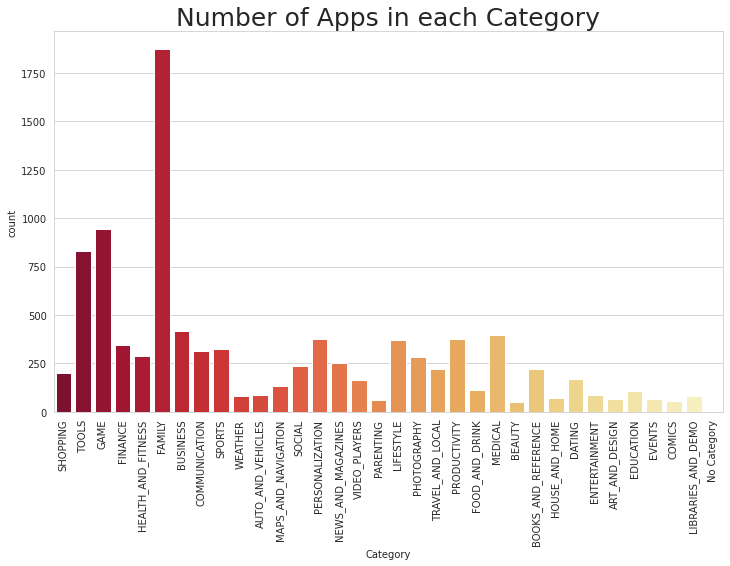

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
plt.rcParams['font.size'] = 10 
sns.countplot(x='Category',data=df , palette = 'YlOrRd_r' )
plt.title('Number of Apps in each Category',size=25)
plt.xticks(rotation=90)
plt.ylabel = 'Number of Apps'
plt.xlabel ='Category'
plt.show()

**This plotting shows no. of Apps present in categories**

*Family has more no. Apps compare to other categories*

## *2) Top 10 Genres with highest number of Apps*

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

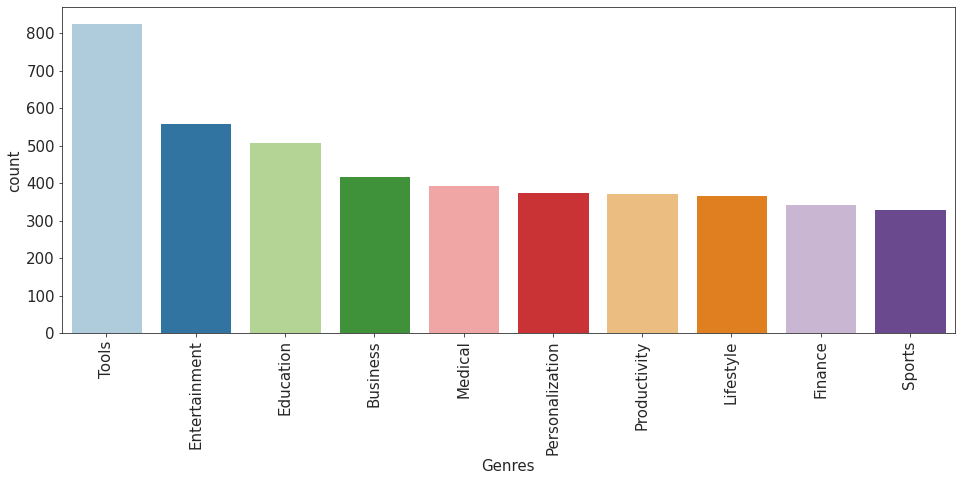

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'Genres', data = df,order=df['Genres'].value_counts().head(10).index,palette='Paired')
plt.xlabel = "Genres" 
plt.ylabel = "Number of Apps"
plt.xticks(rotation=90)

*There are 119 Genres on total, above plot shows only top 10 of them. We can see that most of the apps present in play store are from Genre 'Tools'.*

## *3)Free vs Paid Apps via categories*

In [ ]:
# Describing The Dataset For Null Values.
types = df.Type.unique()
types

array(['Free', 'Paid'], dtype=object)

In [ ]:
# Removing Null Values Using dropna Function
valid_df = df
valid_df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10712,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392,16.175428,1000000,Free,0.0,Everyone,Shopping,2018-08-08,Varies with device,Varies with device
10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.6,50000,Free,0.0,Everyone,Tools,2018-08-08,1.1.9,4.0.3 and up
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27.0,50000000,Free,0.0,Teen,Action,2018-08-08,1.1.2,4.1 and up
10718,BankNordik,FINANCE,3.9,28,15.0,5000,Free,0.0,Everyone,Finance,2018-08-08,7.3.2,5.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8084,Freecell CY,GAME,4.0,387,1.1,50000,Free,0.0,Everyone,Card,2011-04-16,1.3.3,1.6 and up
8418,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.1,5000000,Free,0.0,Everyone 10+,Action,2011-04-11,1.4.3,2.0 and up
10282,FD Shift Calendar Widget,TOOLS,4.1,981,0.073,100000,Free,0.0,Everyone,Tools,2011-03-16,1.2.4,1.6 and up
7430,CJ Poker Odds Calculator,GAME,4.1,207,0.116,50000,Free,0.0,Everyone,Card,2011-01-30,1.2,1.6 and up


In [ ]:
#groupby category and find the value of free and paid apps
valid_df.groupby('Category')['Type'].value_counts()

Category           Type
ART_AND_DESIGN     Free     61
                   Paid      3
AUTO_AND_VEHICLES  Free     82
                   Paid      3
BEAUTY             Free     53
                          ... 
TRAVEL_AND_LOCAL   Paid     12
VIDEO_PLAYERS      Free    160
                   Paid      4
WEATHER            Free     71
                   Paid      8
Name: Type, Length: 64, dtype: int64

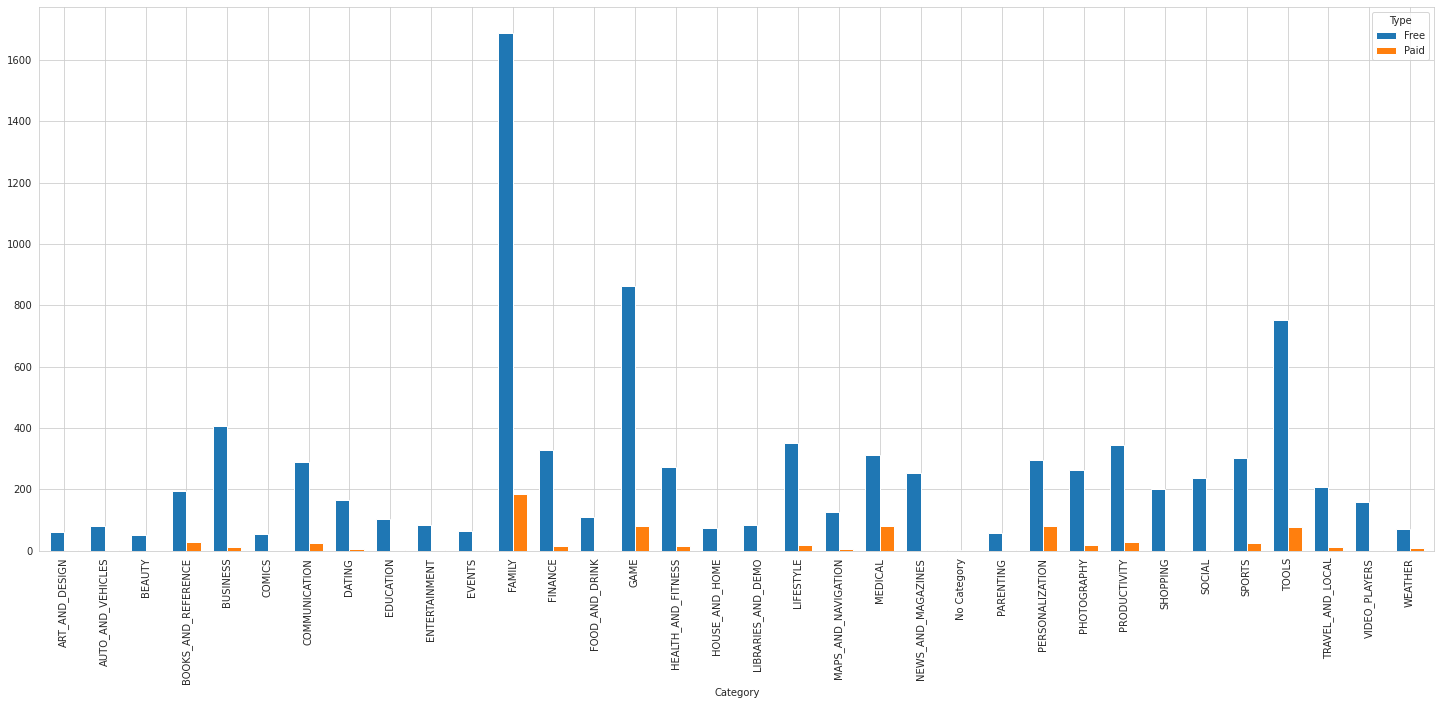

In [ ]:
Type_cat = valid_df.groupby('Category')['Type'].value_counts().unstack().plot.bar(figsize=(25,10), width=0.7)
plt.xlabel="Categories Of Apps"
plt.ylabel="No Of Counts"
plt.title="count comparison of free and paid apps via catagories"
plt.show()



**This graph show no. counts of free and paid apps through categories**

## *4) Top categories on play store*

In [ ]:
y = df['Category'].value_counts().index
x = df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

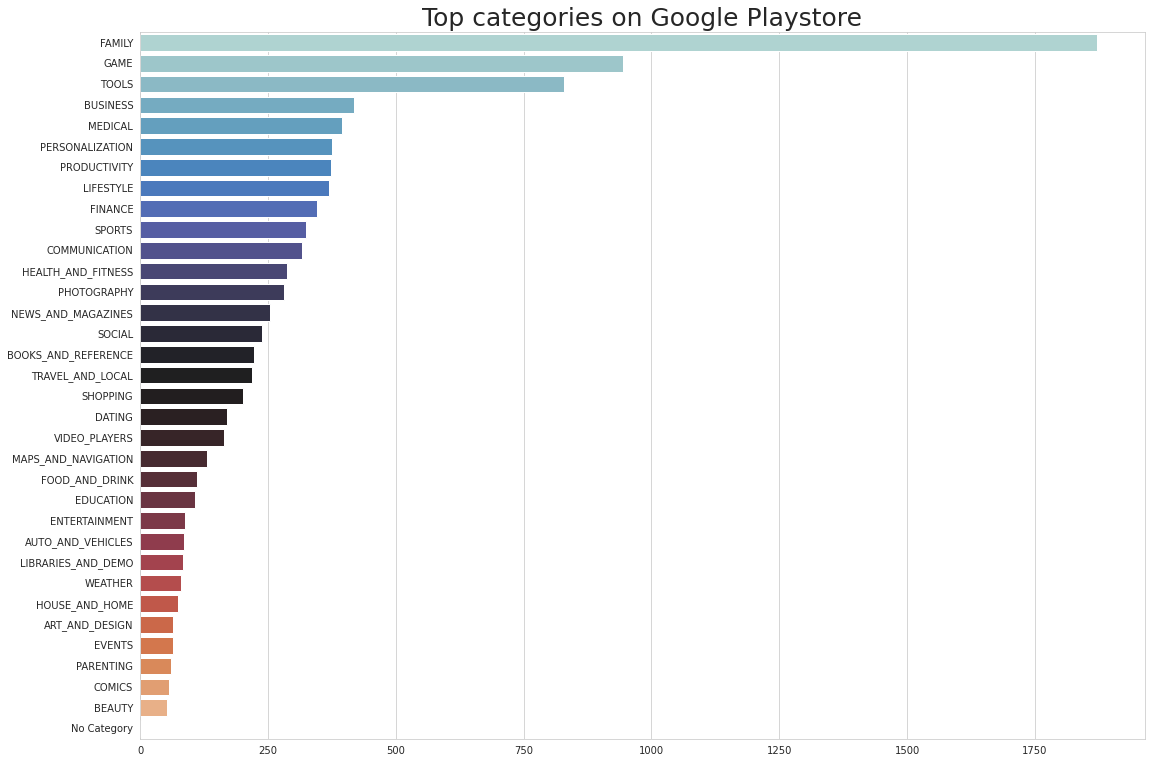

In [ ]:
plt.figure(figsize=(18,13))
plt.xlabel="Count"
plt.ylabel="Category"

graph = sns.barplot(x = xsis, y = ysis, palette= "icefire")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

This graph shows top categories which have more no. of apps in play store

## *5) Apps vs Content Rating*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


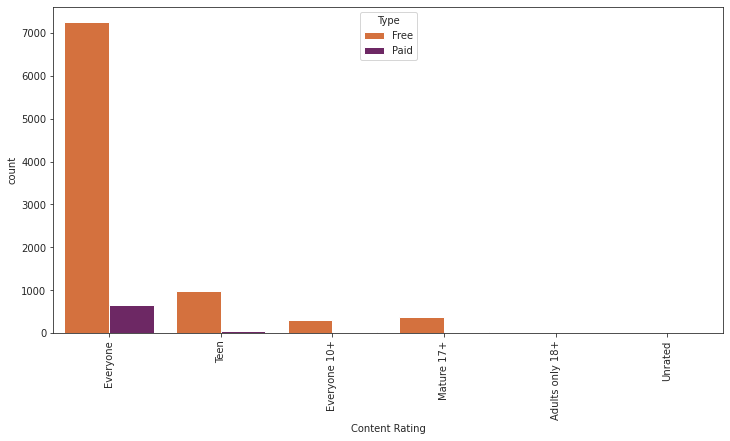

In [ ]:
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (12,6) 
sns.countplot(df['Content Rating'],hue = 'Type',data = df,palette= "inferno_r")
plt.title = 'Apps Vs Content Rating'
plt.ylabel ='Number of Apps'
plt.xlabel ='Rated for Age Grp'
plt.xticks(rotation = 90)
plt.show()

*this graph shows content rating for apps*

## *6)  App Vs Android Version*

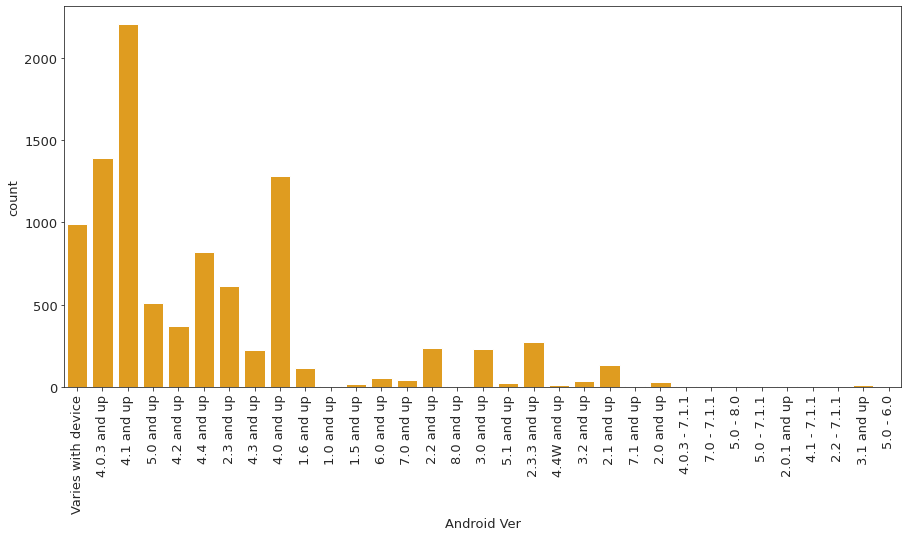

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['font.size'] = 13
plt.title = "Number of Apps as per Android Version"
sns.countplot(x = 'Android Ver', data = df,color = 'orange')
plt.xlabel = "Android Ver"
plt.ylabel = "Number of Apps"
plt.xticks(rotation = 90)
plt.show()

**Most of the apps are on Android version '4.1 and up'**

## *7) Sentiment Analysis through user reviews*

In [ ]:
merged_df_sentiment_ds = df.merge(sentiment_df,on='App')

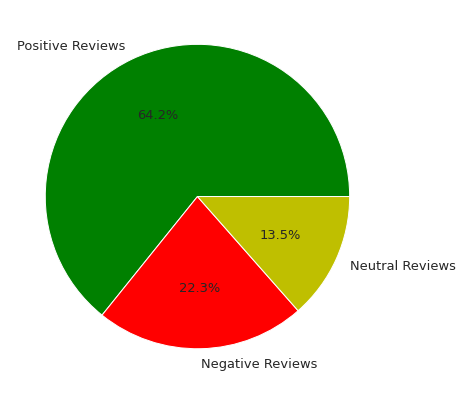

In [ ]:
plt.figure(figsize = (7,7))
labels='Positive Reviews','Negative Reviews','Neutral Reviews'
merged_df_sentiment_ds['Sentiment'].value_counts().plot.pie(labels=labels,autopct = '%.1f%%',colors = [ 'g', 'r', 'y'])
plt.title ='Sentiments Analysis'
plt.axis('off')
plt.rcParams['font.size'] = 20
plt.show()

**This shows more than half reviews are positive**

# *8) Sentiment Analysis Through Categories*

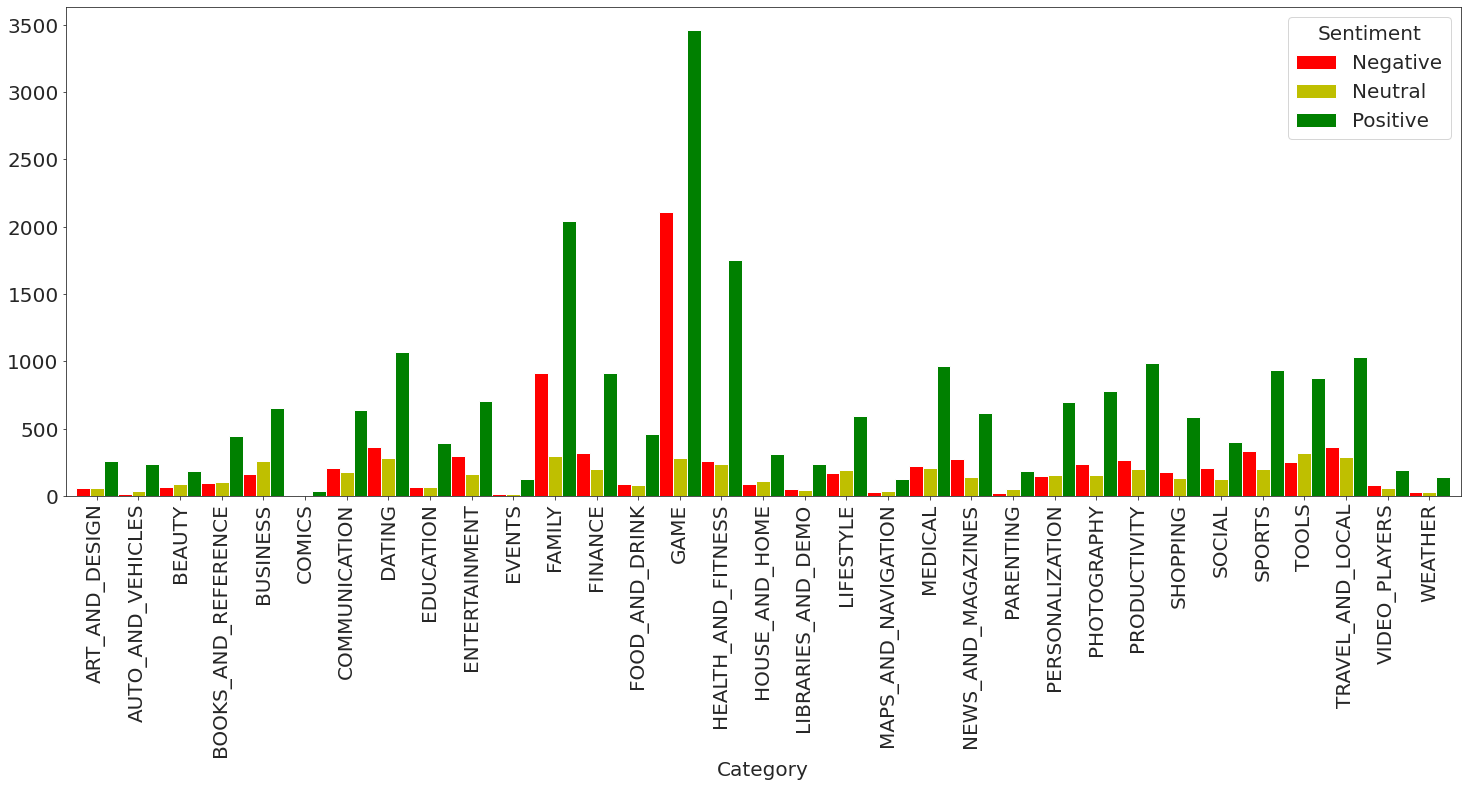

In [ ]:
s = merged_df_sentiment_ds.groupby(['Category','Sentiment'])['Sentiment'].size().unstack()
ax = s.plot.bar(figsize = (25,9),width = 1,color=['r','y','g'])
plt.rcParams['font.size'] = 15
plt.xlabel = 'Category'
plt.title = ('category Vs sentiment') 
size=25

***Game category has large number of positive and negetive sentiments***

## Conclusion

* In this EDA, i analysed the given two datasets and done Data Visualization to
make it more understandable and to draw meaningful insights for app developers to understand user's demands and preferences better and work accordingly.Initially i focused more on the data exploring and cleaning, in order to ensure that we give them the best results out of our analysis

* from the plot i seen Family Game Tools are the top categories which contains more number of apps from given dataset , there are more than 1750 app available in family category

* from plotting i get top ten genre which has more numbers of apps in which Tools and entertainment genre have more numbers of apps

* Family , Game , Tools are top three categories having maximum number of free and paid apps category Family has 1600 Free and 200 Paid Apps

* Apps rated for everyone has highest number of installs followed by Apps rated for Teen

* From data visulization i seen most of app run on android version '4.1 and up' 

*  Most of the reviews are of Positive Sentiment, while Negative and Neutral have low number of reviews , 64.2% more than half of the reviews are positive.

* The sentiment polarity of most of the users is towards positive site

* Game category has more number of positive , negative and neutral sentiment





